In [2]:
import numpy as np
import json
import pprint
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns 
from pandas.io.json import json_normalize


In [1]:
!pip install seaborn


     |████████████████████████████████| 292 kB 1.6 MB/s eta 0:00:01


In [3]:
with open('../data/statsbomb360/events/3788747.json', 'r') as file:
    matches=json.load(file)


matches = json_normalize(matches)
#print(matches.head())
#pprint.pprint(matches[25])






/var/folders/hc/kj07xtm15315cp_j0qnd6qcw0000gn/T/ipykernel_79518/4078500269.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  matches = json_normalize(matches)


In [4]:
with open('../data/statsbomb360/events/3788747.json', 'r', encoding='utf-8') as file:  ## je sais pas ce que ca fait la partie encoding, je te laisse comme le truc d'origine pour l'instant##
    events=json.load(file)

events = json_normalize(events)
#print(events[(events["type.name"]=="Pass")]) 

passes_austria = events[(events["type.name"]=="Pass") & (events["possession_team.name"]=="Austria")]["location"]
passes_austria_to = events[(events["type.name"]=="Pass") & (events["possession_team.name"]=="Austria")]["pass.end_location"]

passes_north_macedonia = events[(events["type.name"]=="Pass") & (events["possession_team.name"]=="North Macedonia")]["location"]
passes_north_macedonia_to = events[(events["type.name"]=="Pass") & (events["possession_team.name"]=="North Macedonia")]["pass.end_location"]





/var/folders/hc/kj07xtm15315cp_j0qnd6qcw0000gn/T/ipykernel_79518/2759659629.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  events = json_normalize(events)


In [5]:
passes_austria = np.asarray(passes_austria)
passes_austria_to = np.asarray(passes_austria_to)
passes_north_macedonia = np.asarray(passes_north_macedonia)
passes_north_macedonia_to = np.asarray(passes_north_macedonia_to)


Text(0.5, 1.0, 'Passes by Austria')

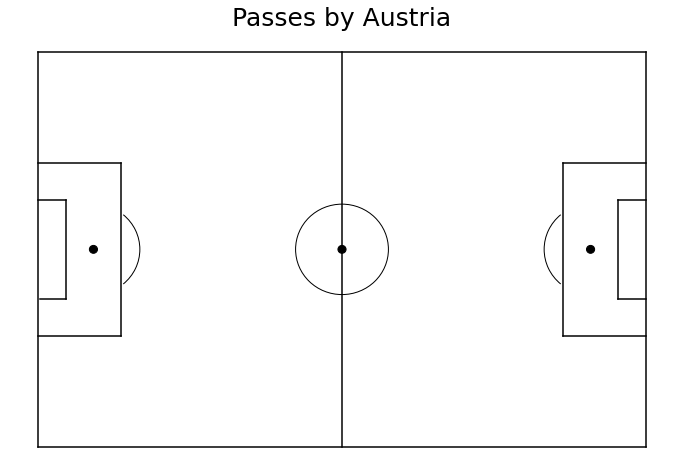

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[57.5,22.5],color="black")
plt.plot([0,16.5],[57.5,57.5],color="black")
plt.plot([16.5,0],[22.5,22.5],color="black")

#Right Penalty Area
plt.plot([120,103.5],[57.5, 57.5],color="black")
plt.plot([103.5,103.5],[57.5,22.5],color="black")
plt.plot([103.5,120],[22.5,22.5],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="black")
plt.plot([5.5,5.5],[50,30],color="black")
plt.plot([5.5,0.5],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114.5],[50,50],color="black")
plt.plot([114.5,114.5],[50,30],color="black")
plt.plot([114.5,120],[30,30],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((11,40),0.8,color="black")
rightPenSpot = plt.Circle((109,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((109,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

plt.axis('off')

plt.title("Passes by Austria", size=25)


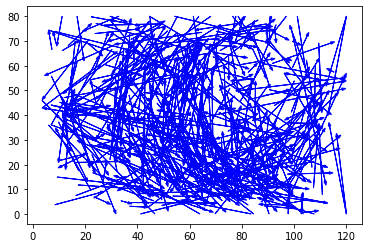

In [7]:
for i in range(len(passes_austria)):
    x = passes_austria[i][0]
    y = passes_austria[i][1]
    dx = passes_austria_to[i][0]-passes_austria[i][0]
    dy = passes_austria_to[i][1]-passes_austria[i][1]
    plt.plot(x, y)
    plt.arrow(x,y,dx,dy, head_width=1, length_includes_head=True, color="blue")
plt.savefig("all_passes_austria.png")
plt.show()


Text(0.5, 1.0, 'Passes by North Macedonia')

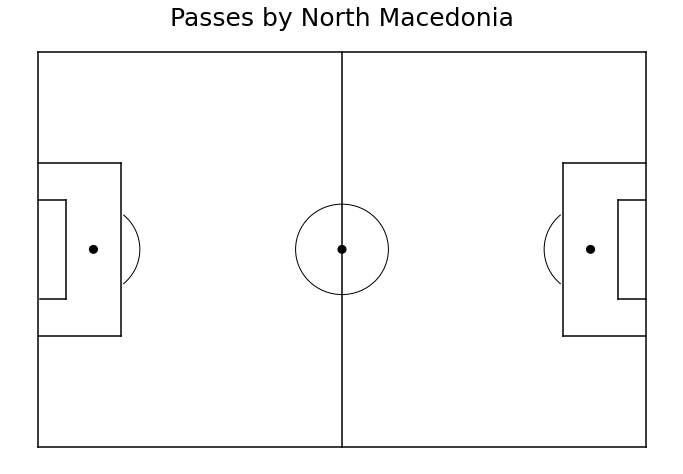

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[57.5,22.5],color="black")
plt.plot([0,16.5],[57.5,57.5],color="black")
plt.plot([16.5,0],[22.5,22.5],color="black")

#Right Penalty Area
plt.plot([120,103.5],[57.5, 57.5],color="black")
plt.plot([103.5,103.5],[57.5,22.5],color="black")
plt.plot([103.5,120],[22.5,22.5],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="black")
plt.plot([5.5,5.5],[50,30],color="black")
plt.plot([5.5,0.5],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114.5],[50,50],color="black")
plt.plot([114.5,114.5],[50,30],color="black")
plt.plot([114.5,120],[30,30],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((11,40),0.8,color="black")
rightPenSpot = plt.Circle((109,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((109,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

plt.axis('off')
plt.title("Passes by North Macedonia", size=25)

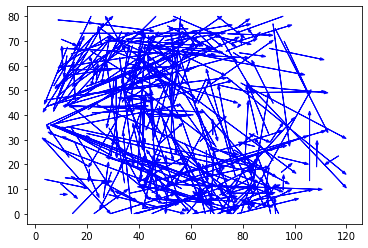

In [9]:
for i in range(len(passes_north_macedonia)):
    x = passes_north_macedonia[i][0]
    y = passes_north_macedonia[i][1]
    dx = passes_north_macedonia_to[i][0]-passes_north_macedonia[i][0]
    dy = passes_north_macedonia_to[i][1]-passes_north_macedonia[i][1]
    plt.plot(x, y)
    plt.arrow(x,y,dx,dy, head_width=1, length_includes_head=True, color="blue")
plt.savefig("all_passes_north_macedonia.png")
plt.show()


/Users/timpoux-guillaume/opt/anaconda3/envs/soccer-analytics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


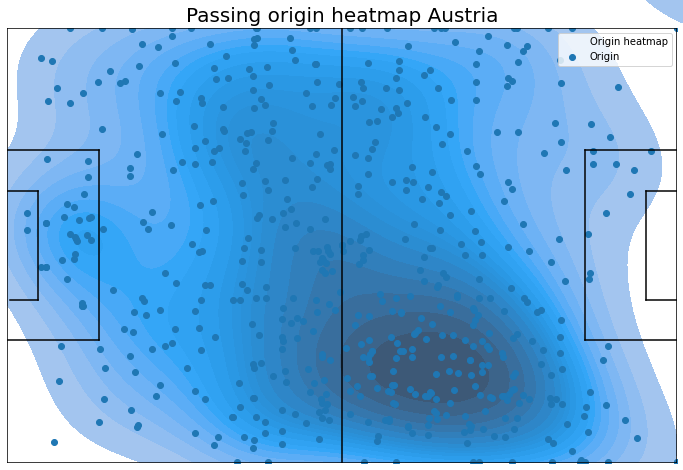

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[57.5,22.5],color="black")
plt.plot([0,16.5],[57.5,57.5],color="black")
plt.plot([16.5,0],[22.5,22.5],color="black")

#Right Penalty Area
plt.plot([120,103.5],[57.5, 57.5],color="black")
plt.plot([103.5,103.5],[57.5,22.5],color="black")
plt.plot([103.5,120],[22.5,22.5],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="black")
plt.plot([5.5,5.5],[50,30],color="black")
plt.plot([5.5,0.5],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114.5],[50,50],color="black")
plt.plot([114.5,114.5],[50,30],color="black")
plt.plot([114.5,120],[30,30],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((11,40),0.8,color="black")
rightPenSpot = plt.Circle((109,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((109,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

plt.axis('off')

passes_austria_arr = np.reshape(list(passes_austria),(-1,2))
passes_austria_to_arr = np.reshape(list(passes_austria_to),(-1,2))

sns.kdeplot(passes_austria_arr[:,0],passes_austria_arr[:,1],  shade=True,n_levels=20, label="Origin heatmap")
plt.scatter(passes_austria_arr[:,0],passes_austria_arr[:,1], label="Origin")

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.title("Passing origin heatmap Austria", size=20)
plt.legend()
plt.savefig("Passing_origin_heatmap_austria.png")
plt.show()


/Users/timpoux-guillaume/opt/anaconda3/envs/soccer-analytics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


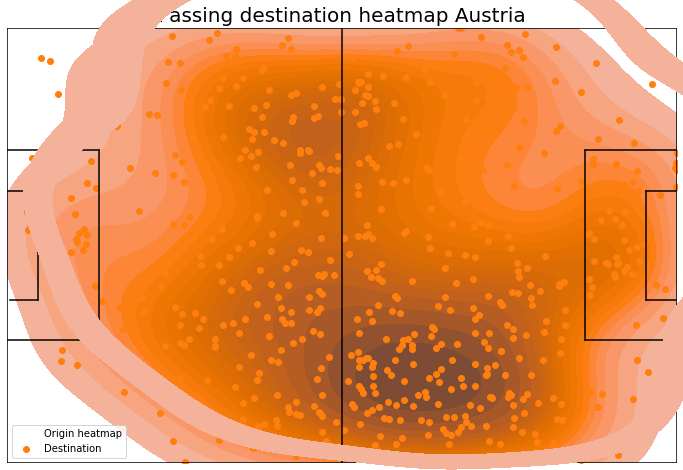

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[57.5,22.5],color="black")
plt.plot([0,16.5],[57.5,57.5],color="black")
plt.plot([16.5,0],[22.5,22.5],color="black")

#Right Penalty Area
plt.plot([120,103.5],[57.5, 57.5],color="black")
plt.plot([103.5,103.5],[57.5,22.5],color="black")
plt.plot([103.5,120],[22.5,22.5],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="black")
plt.plot([5.5,5.5],[50,30],color="black")
plt.plot([5.5,0.5],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114.5],[50,50],color="black")
plt.plot([114.5,114.5],[50,30],color="black")
plt.plot([114.5,120],[30,30],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((11,40),0.8,color="black")
rightPenSpot = plt.Circle((109,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((109,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

plt.axis('off')

passes_austria_arr = np.reshape(list(passes_austria),(-1,2))
passes_austria_to_arr = np.reshape(list(passes_austria_to),(-1,2))

sns.kdeplot(passes_austria_to_arr[:,0],passes_austria_to_arr[:,1],  shade=True,n_levels=20, label="Origin heatmap", color="tab:orange")
plt.scatter(passes_austria_to_arr[:,0],passes_austria_to_arr[:,1], label="Destination", color="tab:orange")

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.title("Passing destination heatmap Austria", size=20)
plt.legend()
plt.savefig("Passing_destination_heatmap_austria.png")
plt.show()



In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[57.5,22.5],color="black")
plt.plot([0,16.5],[57.5,57.5],color="black")
plt.plot([16.5,0],[22.5,22.5],color="black")

#Right Penalty Area
plt.plot([120,103.5],[57.5, 57.5],color="black")
plt.plot([103.5,103.5],[57.5,22.5],color="black")
plt.plot([103.5,120],[22.5,22.5],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="black")
plt.plot([5.5,5.5],[50,30],color="black")
plt.plot([5.5,0.5],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114.5],[50,50],color="black")
plt.plot([114.5,114.5],[50,30],color="black")
plt.plot([114.5,120],[30,30],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((11,40),0.8,color="black")
rightPenSpot = plt.Circle((109,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((109,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

plt.axis('off')

passes_north_macedonia_arr = np.reshape(list(passes_north_macedonia),(-1,2))
passes_north_macedonia_to_arr = np.reshape(list(passes_north_macedonia_to),(-1,2))

sns.kdeplot(passes_north_macedonia_arr[:,0],passes_north_macedonia_arr[:,1],  shade=True,n_levels=20, label="Origin heatmap")
plt.scatter(passes_north_macedonia_arr[:,0],passes_north_macedonia_arr[:,1], label="Origin")

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.title("Passing origin heatmap North Macedonia", size=20)
plt.legend()
plt.savefig("Passing_origin_heatmap_north_macedonia.png")
plt.show()


/Users/timpoux-guillaume/opt/anaconda3/envs/soccer-analytics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


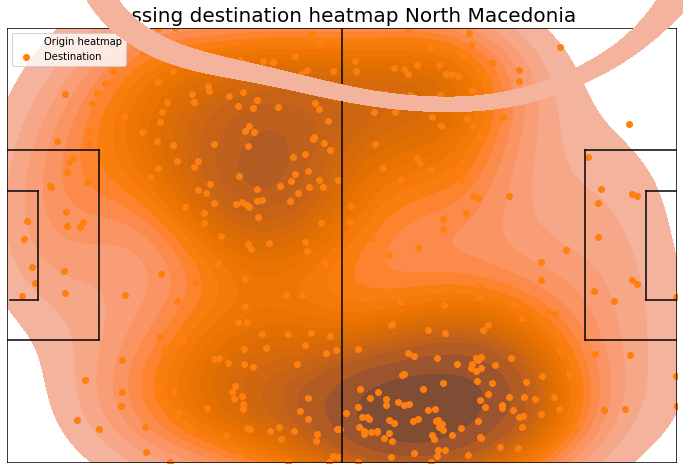

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[57.5,22.5],color="black")
plt.plot([0,16.5],[57.5,57.5],color="black")
plt.plot([16.5,0],[22.5,22.5],color="black")

#Right Penalty Area
plt.plot([120,103.5],[57.5, 57.5],color="black")
plt.plot([103.5,103.5],[57.5,22.5],color="black")
plt.plot([103.5,120],[22.5,22.5],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="black")
plt.plot([5.5,5.5],[50,30],color="black")
plt.plot([5.5,0.5],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114.5],[50,50],color="black")
plt.plot([114.5,114.5],[50,30],color="black")
plt.plot([114.5,120],[30,30],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((11,40),0.8,color="black")
rightPenSpot = plt.Circle((109,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((109,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

plt.axis('off')

passes_north_macedonia_arr = np.reshape(list(passes_north_macedonia),(-1,2))
passes_north_macedonia_to_arr = np.reshape(list(passes_north_macedonia_to),(-1,2))

sns.kdeplot(passes_north_macedonia_to_arr[:,0],passes_north_macedonia_to_arr[:,1],  shade=True,n_levels=20, label="Origin heatmap", color="tab:orange")
plt.scatter(passes_north_macedonia_to_arr[:,0],passes_north_macedonia_to_arr[:,1], label="Destination", color="tab:orange")

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.title("Passing destination heatmap North Macedonia", size=20)
plt.legend()
plt.savefig("Passing_destination_heatmap_north_macedonia.png")
plt.show()
